In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D, rcParams

In [2]:
figdir = '/Users/annabroido/Dropbox/Research/ICONProject/1Scale_Free_Networks/writing/Figures/'
df = pd.read_pickle('/Users/annabroido/Dropbox/Research/LRTAnalysis/SFAnalysis/local/newhyps.p')
# df = df.query('median_alpha<=6.2')
all_alphas = df['median_alpha']
strongest_alphas = df.query('Strongest==True')['median_alpha']
strong_alphas = df.query('Strong==True')['median_alpha']
weak_alphas = df.query('Weak==True')['median_alpha']
weakest_alphas = df.query('Weakest==True')['median_alpha']
superweak_alphas = df.query('Super_Weak==True')['median_alpha']

In [13]:
ALMOST_BLACK = '0.125'
GRAY_COLOR = '0.6'
ALL_COLOR = (0.156, 0.254, 0.466)
SUPERWEAK_COLOR = (0.647, 0.772, 0.972)
WEAKEST_COLOR = (0.419, 0.627, 0.960)
WEAK_COLOR = (0.258, 0.525, 0.85)
STRONG_COLOR = (0.223, 0.368, 0.674)
STRONGEST_COLOR = (0.156, 0.254, 0.466)
LABEL_SIZE = 32
SMALL_LABEL_SIZE = 16
SMALL_TICK_SIZE = 16
TICK_SIZE = 32

rcParams['font.family'] = 'sans-serif' # ... for regular text
rcParams['font.sans-serif'] = ['Helvetica'] #, Avant Garde, Computer Modern Sans serif' # Choose a nice font here
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['xtick.major.pad'] = '8'
rcParams['axes.edgecolor']  = ALMOST_BLACK
rcParams['axes.labelcolor'] = ALMOST_BLACK
rcParams['lines.color']     = ALMOST_BLACK
rcParams['xtick.color']     = ALMOST_BLACK 
rcParams['ytick.color']     = ALMOST_BLACK 
rcParams['text.color']      = ALMOST_BLACK 

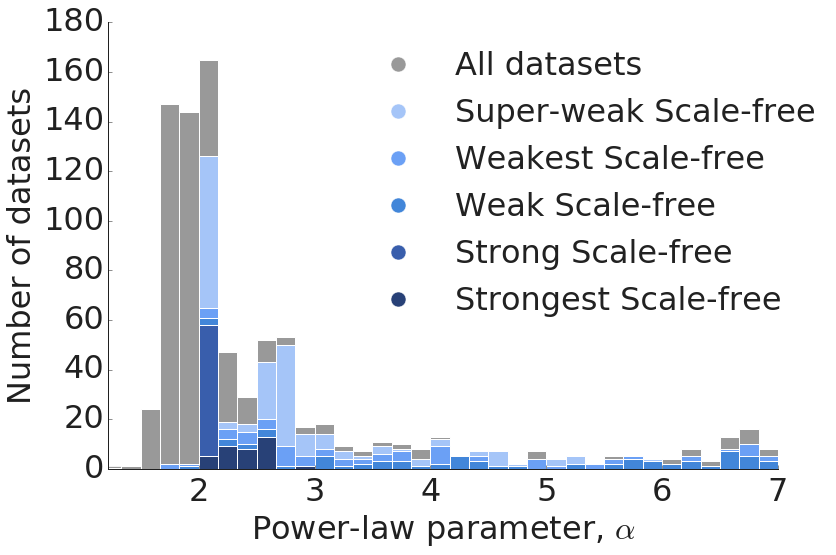

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12,8))


bins = np.arange(4, 46)/6. + 0.5
xpad = 0.2
ax.set_xlim(np.min(all_alphas)-xpad/2, 6.8+xpad)
# ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='k', bins=bins, histtype = 'step', label='All alphas')
ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='w', bins=bins, label='All alphas')
ax.hist(superweak_alphas, bins=bins,edgecolor='w', color=SUPERWEAK_COLOR )
ax.hist(weakest_alphas, bins=bins,edgecolor='w', color=WEAKEST_COLOR )
ax.hist(weak_alphas, bins=bins,edgecolor='w', color=WEAK_COLOR )
ax.hist(strong_alphas, bins=bins,edgecolor='w', color=STRONG_COLOR )
ax.hist(strongest_alphas, bins=bins,edgecolor='w', color=STRONGEST_COLOR )
ax.set_xlabel(r"Power-law parameter, $\alpha$", fontsize=LABEL_SIZE)
ax.set_ylabel("Number of datasets",fontsize=LABEL_SIZE)
#ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE)
ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)

""" Remove the top and right axis """ 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

fake_line_all = Line2D(range(1), range(1), color=GRAY_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
fake_line_superweak = Line2D(range(1), range(1), color=SUPERWEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
fake_line_weakest = Line2D(range(1), range(1), color=WEAKEST_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
fake_line_weak = Line2D(range(1), range(1), color=WEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
fake_line_strong = Line2D(range(1), range(1), color=STRONG_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
fake_line_strongest = Line2D(range(1), range(1), color=STRONGEST_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
ax.legend([fake_line_all,fake_line_superweak, fake_line_weakest, fake_line_weak, fake_line_strong, fake_line_strongest],['All datasets','Super-weak Scale-free', 'Weakest Scale-free', 'Weak Scale-free', 'Strong Scale-free', 'Strongest Scale-free'], numpoints=1, loc='upper right', bbox_to_anchor=(1.1,1), frameon=False, fontsize=LABEL_SIZE)


plt.show()

In [28]:
def alpha_histogram(sf_alphas, sf, sf_color):
    """
    
    Input:
        sf_alphas           ndarray, subset of alphas to plot (i.e. strongest)
        sf                  string, name of sf category (i.e. 'Strongest')
        sf_color            tuple, normalized rgb color
    """
    fig,ax = plt.subplots(1,1,figsize=(3,2))
    
    bins = np.arange(4, 46)/6. + 0.5
    xpad = 0.2
    ax.set_xlim(np.min(all_alphas)-xpad/2, 6.8+xpad)
    ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='w', bins=bins, label='All alphas')
    #ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='k', bins=bins, histtype = 'step', label='All alphas')
    ax.hist(sf_alphas, bins=bins,edgecolor='w', color=sf_color, label='%s Scale-free' %sf )
#     ax.set_xlabel(r"Power-law parameter, $\alpha$", fontsize=LABEL_SIZE)
#     ax.set_ylabel("Number of datasets",fontsize=LABEL_SIZE)
    #ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE)
    ax.set_yticks([0,80,160])
    ax.tick_params(axis='both', which='major', labelsize=SMALL_TICK_SIZE)

    """ Remove the top and right axis """ 
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    fake_line_all = Line2D(range(1), range(1), color=GRAY_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
    fake_line_sf = Line2D(range(1), range(1), color=sf_color, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
#     ax.legend((fake_line_all,fake_line_sf),('All datasets','%s Scale-free' %sf), numpoints=1, loc='upper right', bbox_to_anchor=(1,.95), frameon=False, fontsize=LABEL_SIZE)    
#     ax.legend(loc='upper right', bbox_to_anchor=(1,.9), frameon=False,  fontsize=LABEL_SIZE)
    ax.text(3.2, 100, '%s Scale-free' %sf , fontsize=SMALL_LABEL_SIZE)

    plt.show()


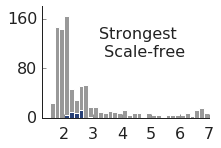

In [29]:
alpha_histogram(strongest_alphas, 'Strongest \n', STRONGEST_COLOR)

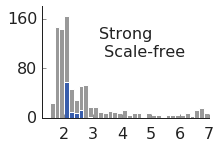

In [30]:
alpha_histogram(strong_alphas, 'Strong \n', STRONG_COLOR)

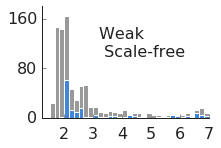

In [31]:
alpha_histogram(weak_alphas, 'Weak \n', WEAK_COLOR)

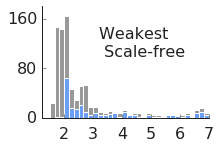

In [32]:
alpha_histogram(weakest_alphas, 'Weakest \n', WEAKEST_COLOR)

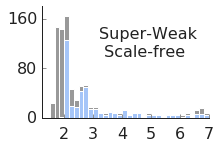

In [33]:
alpha_histogram(superweak_alphas, 'Super-Weak\n', SUPERWEAK_COLOR)

In [89]:
def alpha_histogram_presentation(cat):
    """
    
    Input:
        cat      string, category of interest
    """
    fig, ax = plt.subplots(1,1, figsize=(12,8))
    l = 1 #linewidth
    al = 1 # opacity

    bins = np.arange(4, 46)/6. + 0.5
    xpad = 0.2
    ax.set_xlim(np.min(all_alphas)-xpad/2, 6+xpad)
    # ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='k', bins=bins, histtype = 'step', label='All alphas')
    if cat == 'all':
        ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='w', bins=bins, label='All alphas')
        fake_line_all = Line2D(range(1), range(1), color=GRAY_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
        legend = [fake_line_all]
    elif cat == 'superweak':
#         ax.hist(all_alphas, color='w', edgecolor=GRAY_COLOR, bins=bins, label='All alphas', linewidth=2)
#         fake_line_all = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=GRAY_COLOR, markeredgewidth=2)
        ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='w', bins=bins, label='All alphas', alpha=al)
        fake_line_all = Line2D(range(1), range(1), color=GRAY_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
        ax.hist(superweak_alphas, bins=bins,edgecolor='w', color=SUPERWEAK_COLOR)
        fake_line_superweak = Line2D(range(1), range(1), color=SUPERWEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR)
        legend = [fake_line_all,fake_line_superweak]
    elif cat == 'weakest':
#         ax.hist(all_alphas, color='w', edgecolor=GRAY_COLOR, bins=bins, label='All alphas', linewidth=2)
#         fake_line_all = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=GRAY_COLOR, markeredgewidth=2)
        ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='w', bins=bins, label='All alphas', alpha=al)
        fake_line_all = Line2D(range(1), range(1), color=GRAY_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
#         ax.hist(superweak_alphas, bins=bins,edgecolor=SUPERWEAK_COLOR, color='w', linewidth=2)
#         fake_line_superweak = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR, markeredgewidth=2)
        ax.hist(superweak_alphas, bins=bins,edgecolor='w', color=SUPERWEAK_COLOR, alpha=al)
        fake_line_superweak = Line2D(range(1), range(1), color=SUPERWEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR)
        ax.hist(weakest_alphas, bins=bins,edgecolor='w', color=WEAKEST_COLOR )
        fake_line_weakest = Line2D(range(1), range(1), color=WEAKEST_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=WEAKEST_COLOR)
        legend = [fake_line_all,fake_line_superweak, fake_line_weakest]
    elif cat == 'weak':
#         ax.hist(all_alphas, color='w', edgecolor=GRAY_COLOR, bins=bins, label='All alphas', linewidth=2)
#         fake_line_all = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=GRAY_COLOR, markeredgewidth=2)
        ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='w', linewidth=l, bins=bins, label='All alphas', alpha=al)
        fake_line_all = Line2D(range(1), range(1), color=GRAY_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
#         ax.hist(superweak_alphas, bins=bins,edgecolor=SUPERWEAK_COLOR, color='w', linewidth=2)
#         fake_line_superweak = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR, markeredgewidth=2)
        ax.hist(superweak_alphas, bins=bins,edgecolor='w',linewidth=l, color=SUPERWEAK_COLOR, alpha=al)
        fake_line_superweak = Line2D(range(1), range(1), color=SUPERWEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR)
#         ax.hist(weakest_alphas, bins=bins,edgecolor=WEAKEST_COLOR, color='w', linewidth=2 )
#         fake_line_weakest = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=WEAKEST_COLOR, markeredgewidth=2)
        ax.hist(weakest_alphas, bins=bins,edgecolor='w',linewidth=l, color=WEAKEST_COLOR,alpha=al )
        fake_line_weakest = Line2D(range(1), range(1), color=WEAKEST_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=WEAKEST_COLOR)
        ax.hist(weak_alphas, bins=bins,edgecolor='w',linewidth=l, color=WEAK_COLOR )
        fake_line_weak = Line2D(range(1), range(1), color=WEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
        legend = [fake_line_all,fake_line_superweak, fake_line_weakest, fake_line_weak]      
    elif cat == 'strong':
#         ax.hist(all_alphas, color='w', edgecolor=GRAY_COLOR, bins=bins, label='All alphas', linewidth=2)
#         fake_line_all = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=GRAY_COLOR, markeredgewidth=2)
        ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='w', linewidth=l, bins=bins, label='All alphas', alpha=al)
        fake_line_all = Line2D(range(1), range(1), color=GRAY_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
#         ax.hist(superweak_alphas, bins=bins,edgecolor=SUPERWEAK_COLOR, color='w', linewidth=2)
#         fake_line_superweak = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR, markeredgewidth=2)
        ax.hist(superweak_alphas, bins=bins,edgecolor='w',linewidth=l, color=SUPERWEAK_COLOR, alpha=al)
        fake_line_superweak = Line2D(range(1), range(1), color=SUPERWEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR)
#         ax.hist(weakest_alphas, bins=bins,edgecolor=WEAKEST_COLOR, color='w', linewidth=2 )
#         fake_line_weakest = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=WEAKEST_COLOR, markeredgewidth=2)
        ax.hist(weakest_alphas, bins=bins,edgecolor='w',linewidth=l, color=WEAKEST_COLOR,alpha=al )
        fake_line_weakest = Line2D(range(1), range(1), color=WEAKEST_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=WEAKEST_COLOR)
#         ax.hist(weak_alphas, bins=bins,edgecolor=WEAK_COLOR, color='w' )
#         fake_line_weak = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=WEAK_COLOR, markeredgewidth=2)
        ax.hist(weak_alphas, bins=bins,edgecolor='w',linewidth=l, color=WEAK_COLOR, alpha=al )
        fake_line_weak = Line2D(range(1), range(1), color=WEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w', alpha=al)
        ax.hist(strong_alphas, bins=bins,edgecolor='w', color=STRONG_COLOR )
        fake_line_strong = Line2D(range(1), range(1), color=STRONG_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
        legend = [fake_line_all,fake_line_superweak, fake_line_weakest, fake_line_weak, fake_line_strong]
    elif cat == 'strongest':
        #         ax.hist(all_alphas, color='w', edgecolor=GRAY_COLOR, bins=bins, label='All alphas', linewidth=2)
#         fake_line_all = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=GRAY_COLOR, markeredgewidth=2)
        ax.hist(all_alphas, color=GRAY_COLOR, edgecolor='w', linewidth=l, bins=bins, label='All alphas', alpha=al)
        fake_line_all = Line2D(range(1), range(1), color=GRAY_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
#         ax.hist(superweak_alphas, bins=bins,edgecolor=SUPERWEAK_COLOR, color='w', linewidth=2)
#         fake_line_superweak = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR, markeredgewidth=2)
        ax.hist(superweak_alphas, bins=bins,edgecolor='w',linewidth=l, color=SUPERWEAK_COLOR, alpha=al)
        fake_line_superweak = Line2D(range(1), range(1), color=SUPERWEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=SUPERWEAK_COLOR)
#         ax.hist(weakest_alphas, bins=bins,edgecolor=WEAKEST_COLOR, color='w', linewidth=2 )
#         fake_line_weakest = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=WEAKEST_COLOR, markeredgewidth=2)
        ax.hist(weakest_alphas, bins=bins,edgecolor='w',linewidth=l, color=WEAKEST_COLOR,alpha=al )
        fake_line_weakest = Line2D(range(1), range(1), color=WEAKEST_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor=WEAKEST_COLOR)
#         ax.hist(weak_alphas, bins=bins,edgecolor=WEAK_COLOR, color='w' )
#         fake_line_weak = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=WEAK_COLOR, markeredgewidth=2)
        ax.hist(weak_alphas, bins=bins,edgecolor='w',linewidth=l, color=WEAK_COLOR, alpha=al )
        fake_line_weak = Line2D(range(1), range(1), color=WEAK_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w', alpha=al)
#         ax.hist(strong_alphas, bins=bins,edgecolor=STRONG_COLOR, color='w' )
#         fake_line_strong = Line2D(range(1), range(1), color='w', marker='o',markersize=15, linestyle='None', markeredgecolor=STRONG_COLOR, markeredgewidth=2)
        ax.hist(strong_alphas, bins=bins,edgecolor='w', color=STRONG_COLOR )
        fake_line_strong = Line2D(range(1), range(1), color=STRONG_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
        ax.hist(strongest_alphas, bins=bins,edgecolor='w', color=STRONGEST_COLOR )
        fake_line_strongest = Line2D(range(1), range(1), color=STRONGEST_COLOR, marker='o',markersize=15, linestyle='None', markeredgecolor='w')
        legend = [fake_line_all,fake_line_superweak, fake_line_weakest, fake_line_weak, fake_line_strong, fake_line_strongest]
        

        
    ax.set_xlabel(r"Power-law parameter $\hat{\alpha}$", fontsize=32)
    ax.set_ylabel("Number of datasets",fontsize=32)
    ax.tick_params(axis='both', which='major', labelsize=32)
    # Remove the top and right axis
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.legend(legend,['All datasets','Super-Weak Scale-free', 'Weakest Scale-free', 'Weak Scale-free', 'Strong Scale-free', 'Strongest Scale-free'], numpoints=1, loc='upper right', bbox_to_anchor=(1.1,1), frameon=False, fontsize=32)


    plt.show()

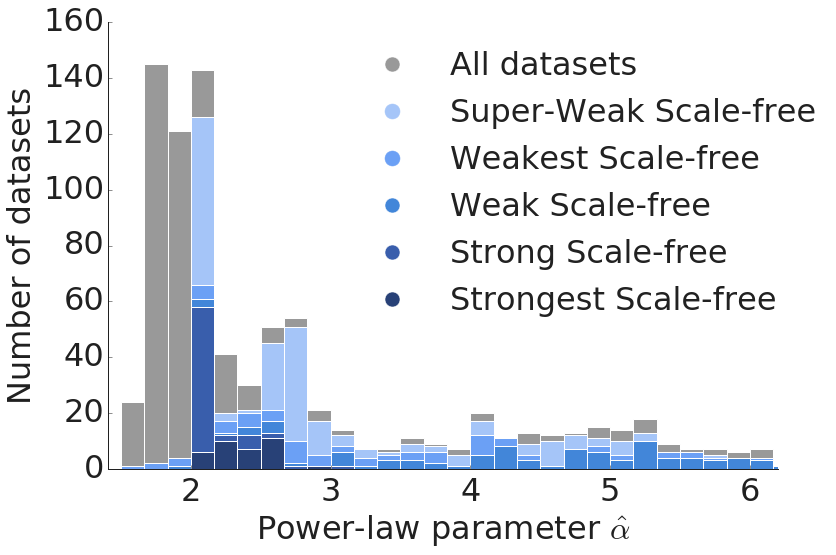

In [90]:
alpha_histogram_presentation('strongest')